In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("realistic_land_price_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Land_ID                  1000 non-null   int64  
 1   Location                 1000 non-null   object 
 2   Area_SqFt                1000 non-null   int64  
 3   Road_Width_Ft            923 non-null    float64
 4   Distance_to_Landmark_Km  938 non-null    float64
 5   Price_per_SqFt_USD       934 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB


In [2]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
# Fill missing values with the mean of each column
# Fill missing values only in numeric columns
df.fillna(df.mean(numeric_only=True), inplace=True)
# Verify that there are no more missing values
print("Missing values after filling:")
print(df.isnull().sum())

Missing values in each column:
Land_ID                     0
Location                    0
Area_SqFt                   0
Road_Width_Ft              77
Distance_to_Landmark_Km    62
Price_per_SqFt_USD         66
dtype: int64
Missing values after filling:
Land_ID                    0
Location                   0
Area_SqFt                  0
Road_Width_Ft              0
Distance_to_Landmark_Km    0
Price_per_SqFt_USD         0
dtype: int64


In [3]:
# one-hot encode categorical variables
df = pd.get_dummies(df, drop_first=False)
# Display the first few rows of the DataFrame
print("Data after one-hot encoding:")
print(df.head())

Data after one-hot encoding:
   Land_ID  Area_SqFt  Road_Width_Ft  Distance_to_Landmark_Km  \
0        1       9982       25.00000                 9.242672   
1        2       6107       21.00000                12.487257   
2        3       3341       26.00000                14.768191   
3        4      13855       29.72481                 4.681879   
4        5      10407       21.00000                14.436465   

   Price_per_SqFt_USD  Location_Downtown  Location_Rural  Location_Suburb  \
0           86.680000              False           False             True   
1          132.661852              False            True            False   
2          101.130000              False           False            False   
3          137.860000              False           False             True   
4          133.450000               True           False            False   

   Location_Urban  
0           False  
1           False  
2            True  
3           False  
4           False

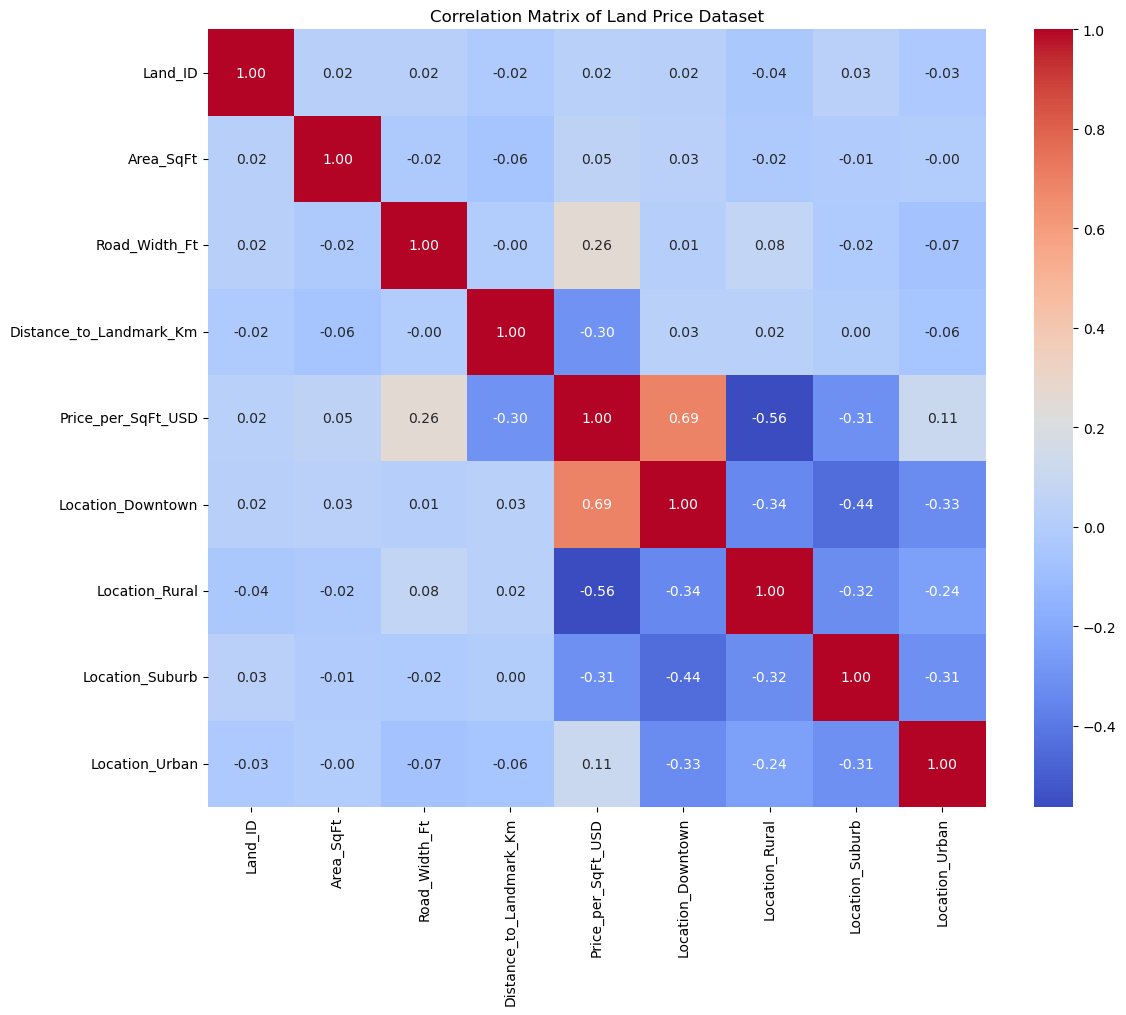

In [4]:
# Correlation matrix
correlation_matrix = df.corr()
# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Land Price Dataset")
plt.tight_layout()
plt.show()

In [5]:
df.head()

,Land_ID,Area_SqFt,Road_Width_Ft,Distance_to_Landmark_Km,Price_per_SqFt_USD,Location_Downtown,Location_Rural,Location_Suburb,Location_Urban
0,1,9982,25.00000,9.242672,86.680000,False,False,True,False
1,2,6107,21.00000,12.487257,132.661852,False,True,False,False
2,3,3341,26.00000,14.768191,101.130000,False,False,False,True
3,4,13855,29.72481,4.681879,137.860000,False,False,True,False
4,5,10407,21.00000,14.436465,133.450000,True,False,False,False


In [6]:
df['Location'] = df[['Location_Downtown', 'Location_Rural', 'Location_Suburb', 'Location_Urban']].idxmax(axis=1).str.replace('Location_', '')

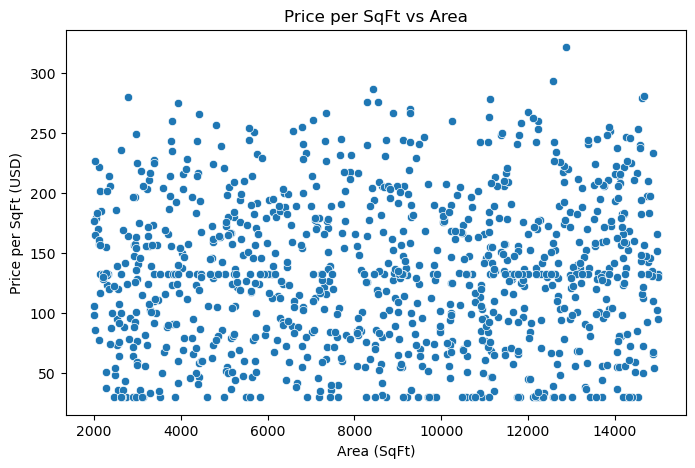

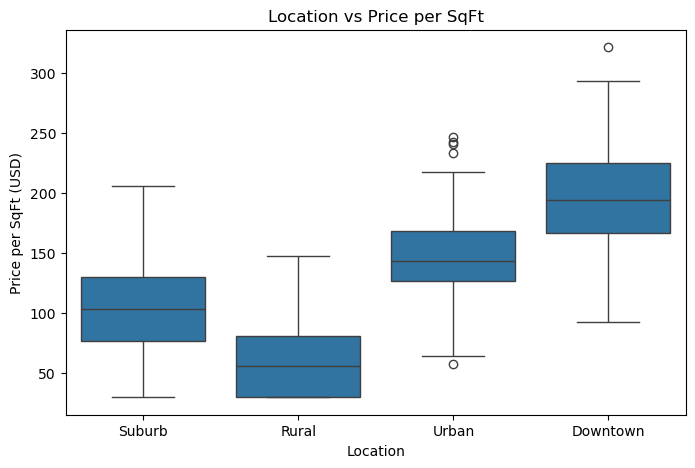

In [7]:
# Price vs Area
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Area_SqFt', y='Price_per_SqFt_USD')
plt.title('Price per SqFt vs Area')
plt.xlabel('Area (SqFt)')
plt.ylabel('Price per SqFt (USD)')
plt.show()

# Location vs Price
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Location', y='Price_per_SqFt_USD')
plt.title('Location vs Price per SqFt')
plt.xlabel('Location')
plt.ylabel('Price per SqFt (USD)')
plt.show()


# # Location_Rural vs Price
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='Location_Rural', y='Price_per_SqFt_USD')
# plt.title('Location_Rural vs Price per SqFt')
# plt.xlabel('Location_Rural')
# plt.ylabel('Price per SqFt (USD)')
# plt.show()

# # Location_Suburb vs Price
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='Location_Suburb', y='Price_per_SqFt_USD')
# plt.title('Location_Suburb vs Price per SqFt')
# plt.xlabel('Location_Suburb')
# plt.ylabel('Price per SqFt (USD)')
# plt.show()

# # Location_Urban vs Price
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='Location_Urban', y='Price_per_SqFt_USD')
# plt.title('Location_Urban vs Price per SqFt')
# plt.xlabel('Location_Urban')
# plt.ylabel('Price per SqFt (USD)')
# plt.show()

# # Location_Downtown vs Price
# plt.figure(figsize=(8, 5))
# sns.boxplot(data=df, x='Location_Downtown', y='Price_per_SqFt_USD')
# plt.title('Location_Downtown vs Price per SqFt')
# plt.xlabel('Location_Downtown')
# plt.ylabel('Price per SqFt (USD)')
# plt.show()

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Split the dataset into features and target variable
X = df.drop(columns=['Price_per_SqFt_USD','Location',"Land_ID"])
y = df['Price_per_SqFt_USD']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 7) (800,)
Testing set shape: (200, 7) (200,)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Land_ID                  1000 non-null   int64  
 1   Area_SqFt                1000 non-null   int64  
 2   Road_Width_Ft            1000 non-null   float64
 3   Distance_to_Landmark_Km  1000 non-null   float64
 4   Price_per_SqFt_USD       1000 non-null   float64
 5   Location_Downtown        1000 non-null   bool   
 6   Location_Rural           1000 non-null   bool   
 7   Location_Suburb          1000 non-null   bool   
 8   Location_Urban           1000 non-null   bool   
 9   Location                 1000 non-null   object 
dtypes: bool(4), float64(3), int64(2), object(1)
memory usage: 50.9+ KB


In [10]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict the prices for the test set
y_pred = model.predict(X_test)

R-squared score of the model: 0.8354311682019592


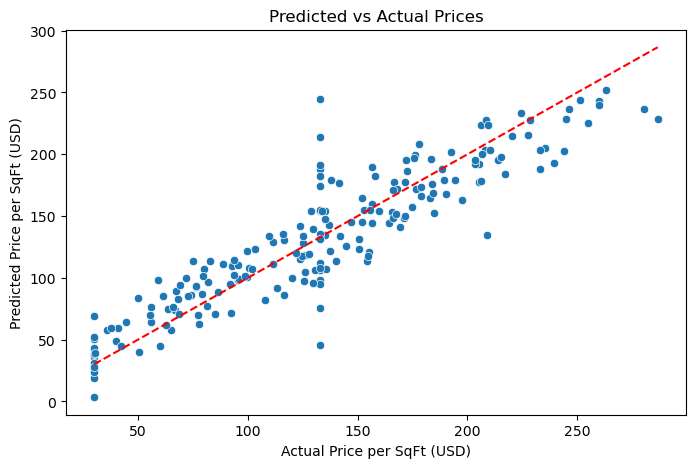

In [11]:
# Calculate the R-squared score of the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score of the model:", r2)
# Plot the predicted vs actual prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price per SqFt (USD)')
plt.ylabel('Predicted Price per SqFt (USD)')
plt.show()

In [12]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics
print("Model Evaluation Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Model Evaluation Metrics:
R-squared: 0.8354
Mean Squared Error (MSE): 620.3293
Root Mean Squared Error (RMSE): 24.9064
Mean Absolute Error (MAE): 19.0681


In [13]:
# Function to predict Price_per_SqFt_USD for custom inputs
def predict_land_price(area_sqft, road_width_ft, distance_to_landmark_km, location):
    # Create input DataFrame
    input_data = pd.DataFrame({
        'Area_SqFt': [area_sqft],
        'Road_Width_Ft': [road_width_ft],
        'Distance_to_Landmark_Km': [distance_to_landmark_km],
        'Location': [location]
    })
    
    # One-hot encode Location to match training data
    input_encoded = pd.get_dummies(input_data, columns=['Location'], prefix='Location')
    
    # Ensure all Location columns are present (add missing ones with zeros)
    for col in ['Location_Downtown', 'Location_Rural', 'Location_Suburb', 'Location_Urban']:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # Select features in the correct order
    input_features = input_encoded[['Area_SqFt', 'Road_Width_Ft', 'Distance_to_Landmark_Km', 
                                   'Location_Downtown', 'Location_Rural', 'Location_Suburb', 'Location_Urban']]
    
    # Predict
    prediction = model.predict(input_features)
    return prediction[0]

In [14]:
predicted_price = predict_land_price(area_sqft=2000, road_width_ft=30, distance_to_landmark_km=5, location='Downtown')
print(f"Predicted Price per SqFt (USD): {predicted_price:.2f}")

Predicted Price per SqFt (USD): 207.48


In [16]:
# Save the model to a file
import joblib
joblib.dump(model, 'land_price_model.pkl')

['land_price_model.pkl']